In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
file = files.upload()
df = pd.read_csv("star_classification.csv")
df.head()

Saving star_classification.csv to star_classification.csv


obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        2        79  6.543777e+18   
1  21.16812  21.61427    4518       301        5       119  1.176014e+19   
2  19.34857  18.94827    3606       301        2       120  5.152200e+18   
3  20.50454  19.25010    4192       301        3       214  1.030107e+19   
4  15.97711  15.54461    8102       301        3       137  6.891865e+18   

    class  redshift  plate    MJD  fiber_ID  
0  GALAXY  0.634794   5812  56354       171  
1  GALAXY  0.779136  10445  58158       427  
2  GALAXY  0.644195   4576  55592       299  
3  GALAXY  0.932346   9149  58039       775  
4  GALAXY  0.116123   6121  56187       842

In [3]:
df.shape

(100000, 18)

In [4]:
df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [5]:
df.describe() #Statistics of the raw data

obj_ID          alpha          delta              u  \
count  1.000000e+05  100000.000000  100000.000000  100000.000000   
mean   1.237665e+18     177.629117      24.135305      21.980468   
std    8.438560e+12      96.502241      19.644665      31.769291   
min    1.237646e+18       0.005528     -18.785328   -9999.000000   
25%    1.237659e+18     127.518222       5.146771      20.352353   
50%    1.237663e+18     180.900700      23.645922      22.179135   
75%    1.237668e+18     233.895005      39.901550      23.687440   
max    1.237681e+18     359.999810      83.000519      32.781390   

                   g              r              i              z  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       20.531387      19.645762      19.084854      18.668810   
std        31.750292       1.854760       1.757895      31.728152   
min     -9999.000000       9.822070       9.469903   -9999.000000   
25%        18.965230      18.135828      17.732285      17.460677   
50%        21.099835      20.125290      19.405145      19.004595   
75%        22.123767      21.044785      20.396495      19.921120   
max        31.602240      29.571860      32.141470      29.383740   

              run_ID  rerun_ID        cam_col       field_ID   spec_obj_ID  \
count  100000.000000  100000.0  100000.000000  100000.000000  1.000000e+05   
mean     4481.366060     301.0       3.511610     186.130520  5.783882e+18   
std      1964.764593       0.0       1.586912     149.011073  3.324016e+18   
min       109.000000     301.0       1.000000      11.000000  2.995191e+17   
25%      3187.000000     301.0       2.000000      82.000000  2.844138e+18   
50%      4188.000000     301.0       4.000000     146.000000  5.614883e+18   
75%      5326.000000     301.0       5.000000     241.000000  8.332144e+18   
max      8162.000000     301.0       6.000000     989.000000  1.412694e+19   

            redshift          plate            MJD       fiber_ID  
count  100000.000000  100000.000000  100000.000000  100000.000000  
mean        0.576661    5137.009660   55588.647500     449.312740  
std         0.730707    2952.303351    1808.484233     272.498404  
min        -0.009971     266.000000   51608.000000       1.000000  
25%         0.054517    2526.000000   54234.000000     221.000000  
50%         0.424173    4987.000000   55868.500000     433.000000  
75%         0.704154    7400.250000   56777.000000     645.000000  
max         7.011245   12547.000000   58932.000000    1000.000000

In [6]:
df.rerun_ID.unique()

array([301])

1) obj_ID, run_ID, rerun_ID, cam_col and spec_obj_ID can be excluded from our modeling data as they do not contribute to the target class scientifically

2) It can also be noted that rerun_ID is the same for the whole dataset and so it does not make any sense to have it in our modeling data

In [7]:
df2 = df.drop(columns = ['obj_ID','run_ID','rerun_ID','cam_col','spec_obj_ID']) #Dropping redundant columns
df2.head()

alpha      delta         u         g         r         i         z  \
0  135.689107  32.494632  23.87882  22.27530  20.39501  19.16573  18.79371   
1  144.826101  31.274185  24.77759  22.83188  22.58444  21.16812  21.61427   
2  142.188790  35.582444  25.26307  22.66389  20.60976  19.34857  18.94827   
3  338.741038  -0.402828  22.13682  23.77656  21.61162  20.50454  19.25010   
4  345.282593  21.183866  19.43718  17.58028  16.49747  15.97711  15.54461   

   field_ID   class  redshift  plate    MJD  fiber_ID  
0        79  GALAXY  0.634794   5812  56354       171  
1       119  GALAXY  0.779136  10445  58158       427  
2       120  GALAXY  0.644195   4576  55592       299  
3       214  GALAXY  0.932346   9149  58039       775  
4       137  GALAXY  0.116123   6121  56187       842

In [8]:
print(df2.shape)
print(df2.isnull().sum())

(100000, 13)
alpha       0
delta       0
u           0
g           0
r           0
i           0
z           0
field_ID    0
class       0
redshift    0
plate       0
MJD         0
fiber_ID    0
dtype: int64


There are no missing values to handle and all the data is accounted for.

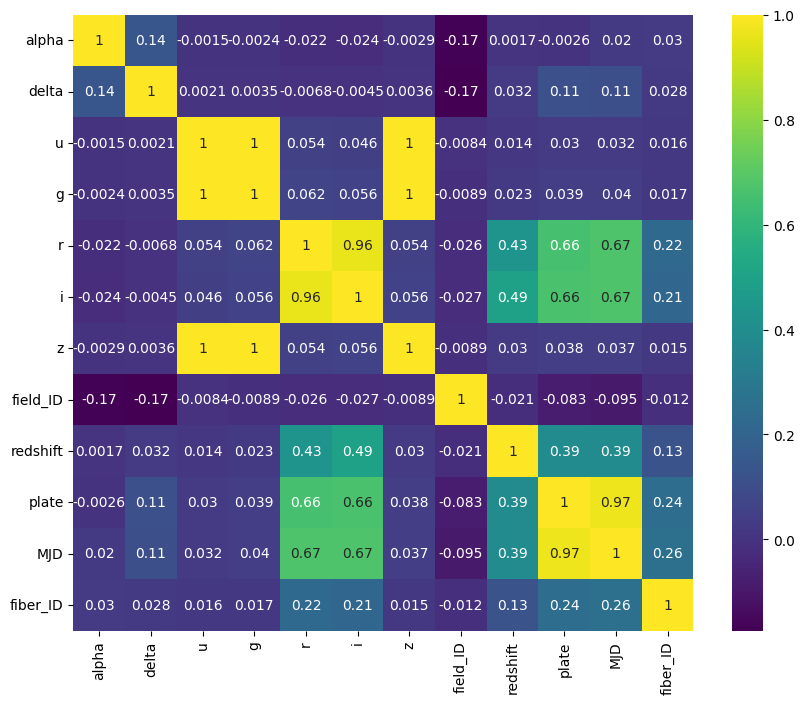

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,8))
sns.heatmap(df2.drop(columns = ['class']).corr(), cmap = 'viridis', annot = True) #Plotting the correlation matrix
plt.show()

<Axes: >

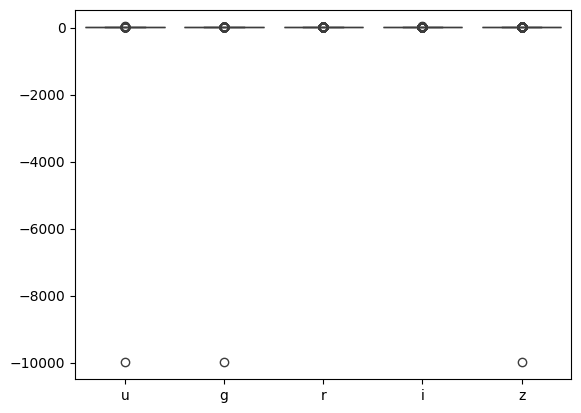

In [10]:
sns.boxplot(df2[['u','g','r','i','z']]) #Plotting boxplot to check for outliers

<Axes: >

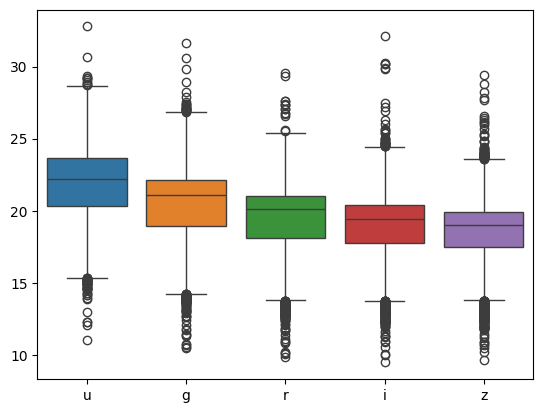

In [11]:
df3 = df2.loc[~(df2['u'] == -9999)] #Excluding outliers from the data
sns.boxplot(df3[['u','g','r','i','z']]) #Rechecking for outliers by using boxplots

In [12]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor() #Initiating Local outlier factor
y_pred = clf.fit_predict(df3.drop(columns = ['class'])) #Fitting X to check outlier score

In [13]:
x_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = x_score

threshold = np.quantile(x_score , .10)
filter = outlier_score["score"] < threshold
outlier_index = outlier_score[filter].index.tolist()

In [14]:
threshold

-1.1890239820117188

In [15]:
len(outlier_index)

10000

In [16]:
df3.drop(outlier_index, inplace=True)

<ipython-input-16-f7f49cb4a002>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop(outlier_index, inplace=True)


In [17]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89999 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   alpha     89999 non-null  float64
 1   delta     89999 non-null  float64
 2   u         89999 non-null  float64
 3   g         89999 non-null  float64
 4   r         89999 non-null  float64
 5   i         89999 non-null  float64
 6   z         89999 non-null  float64
 7   field_ID  89999 non-null  int64  
 8   class     89999 non-null  object 
 9   redshift  89999 non-null  float64
 10  plate     89999 non-null  int64  
 11  MJD       89999 non-null  int64  
 12  fiber_ID  89999 non-null  int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 9.6+ MB


<Axes: >

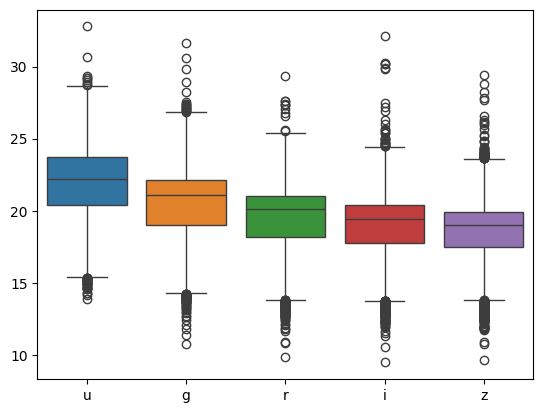

In [18]:
sns.boxplot(df3[['u','g','r','i','z']])

<Figure size 1000x800 with 0 Axes>

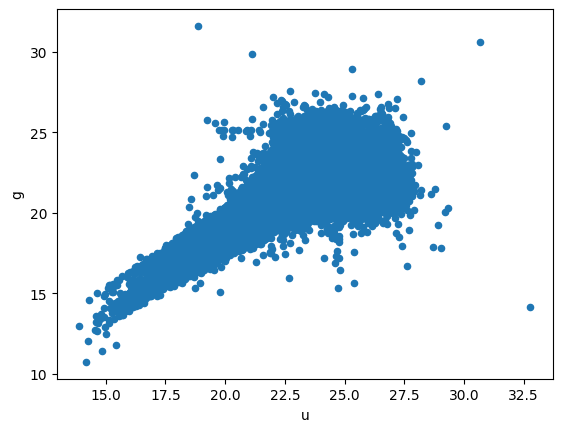

In [19]:
plt.figure(figsize = (10,8))

df3.plot.scatter(x = 'u', y = 'g')
plt.show()

<Figure size 1000x800 with 0 Axes>

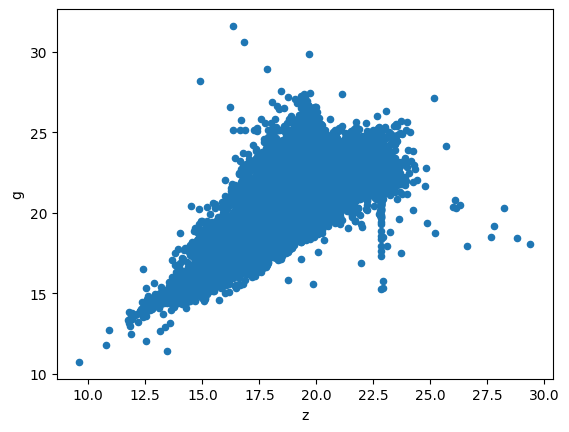

In [20]:
plt.figure(figsize = (10,8))

df3.plot.scatter(x = 'z', y = 'g')
plt.show()

<Figure size 1000x800 with 0 Axes>

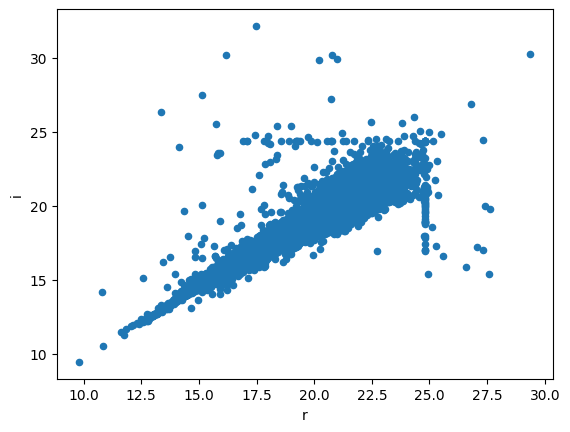

In [21]:
plt.figure(figsize = (10,8))

df3.plot.scatter(x = 'r', y = 'i')
plt.show()

<Figure size 1000x800 with 0 Axes>

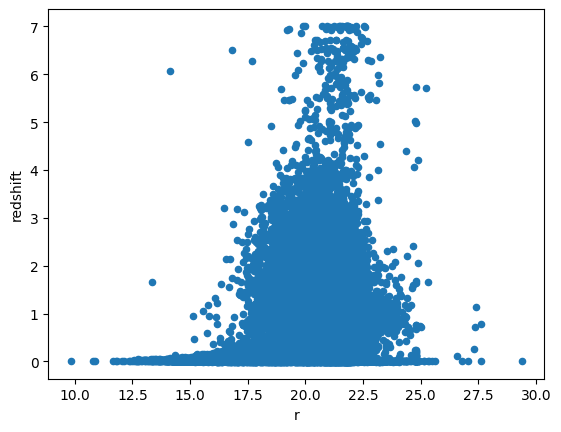

In [22]:
plt.figure(figsize = (10,8))

df3.plot.scatter(x = 'r', y = 'redshift')
plt.show()

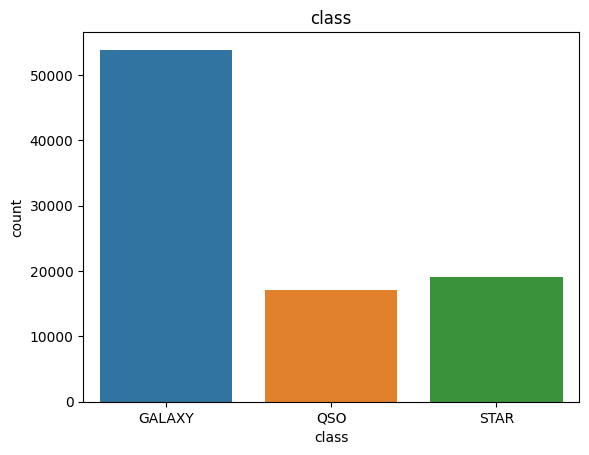

In [23]:
categorical_list = ["class"]
df_categoric = df3.loc[:, categorical_list]
for i in categorical_list:
    plt.figure()
    sns.countplot(x = i, data = df_categoric,hue = "class")
    plt.title(i)

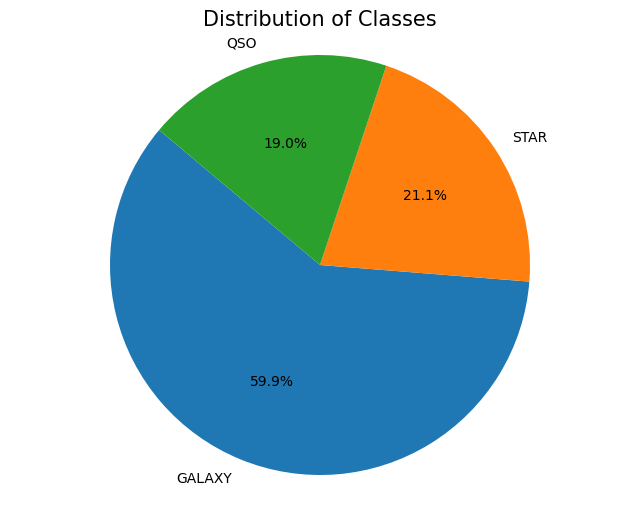

In [24]:
# Count the frequency of each class
class_counts = df3['class'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Classes', size = 15)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

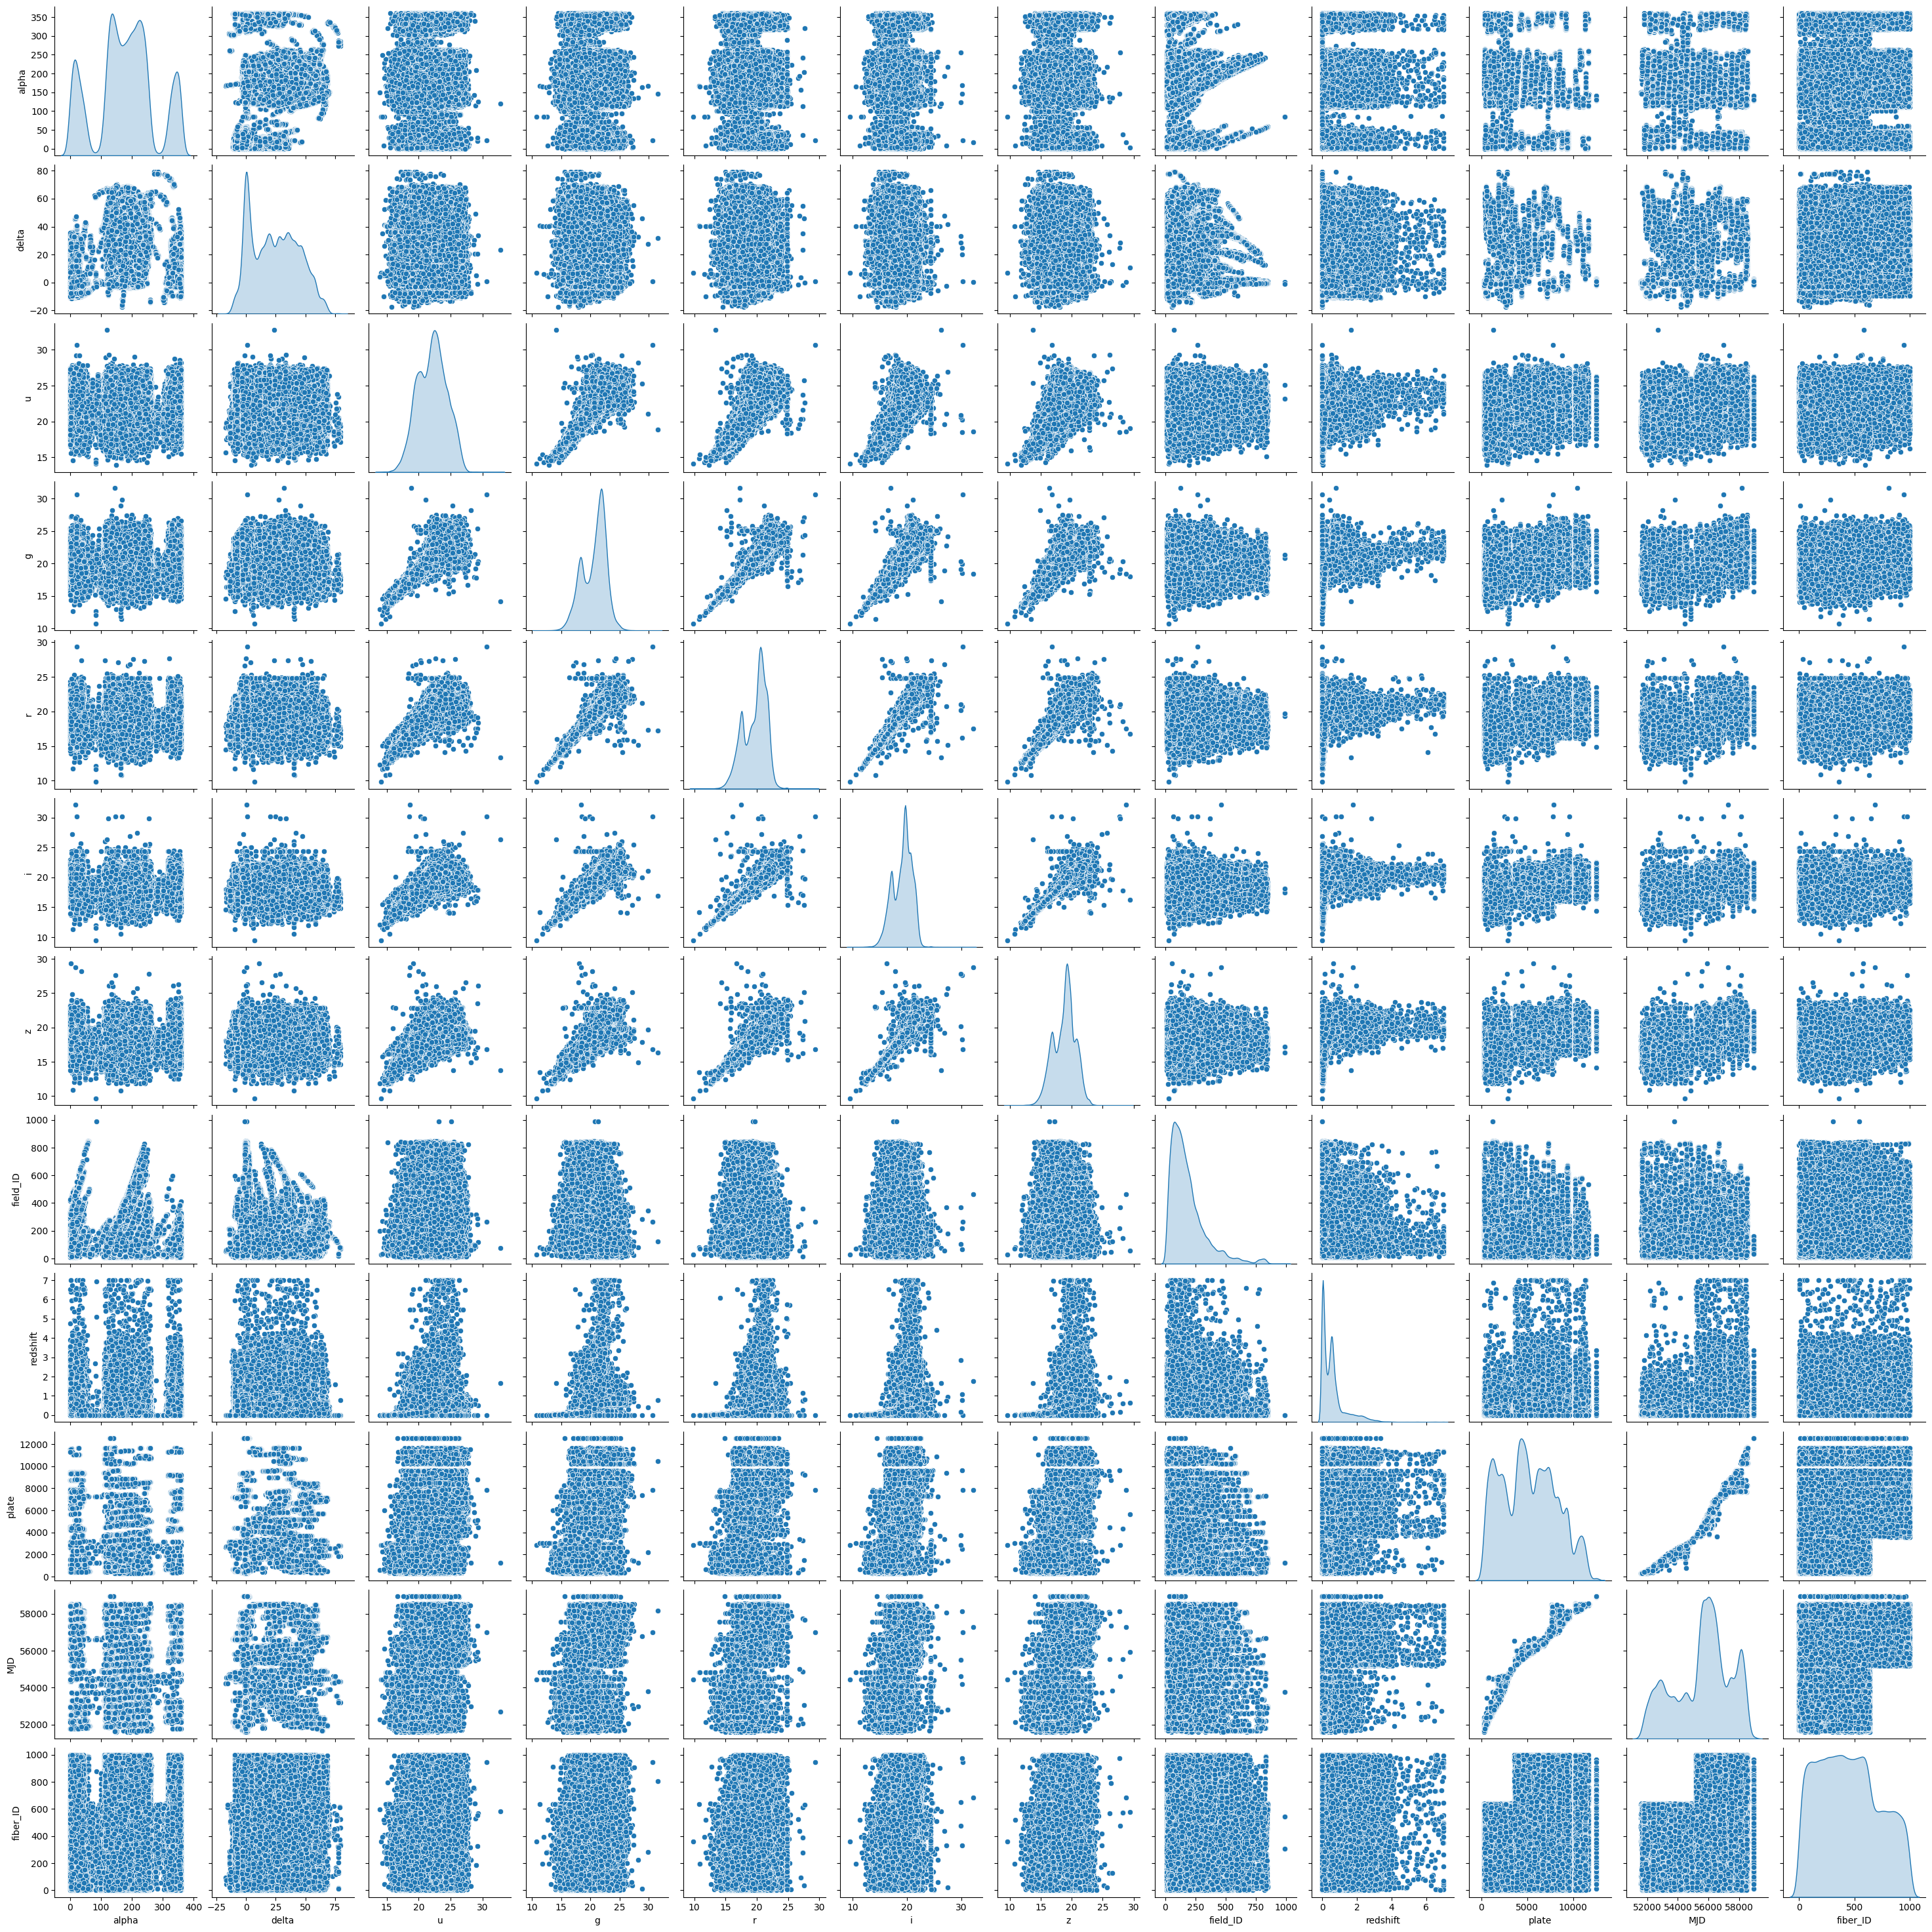

In [ ]:
sns.pairplot(df3.drop(columns = ['class']), diag_kind = "kde")
plt.show()

In [25]:
x = df3.drop(["class"], axis = 1) #Defining X for model building
y = df3.loc[:,"class"].values #Defining y for model building

In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler() #Initiating StandardScaler
x = scaler.fit_transform(x) #Standardizing X

In [27]:
y=pd.DataFrame(y,columns=["class"])

In [28]:
from sklearn.decomposition import PCA
pca = PCA(0.95) #Initiating Principle Component Analysis with variance to be captured as 95%
principal_components = pca.fit_transform(x) #Performing PCA
principal_df = pd.DataFrame(data = principal_components, columns = ['pc1', 'pc2','pc3','pc4','pc5','pc6','pc7']) #Extaracting the PCAs and transforming the data into a dataframe

In [29]:
df_final = pd.concat([principal_df, y[['class']]], axis = 1)

In [30]:
df_final

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0     -0.852862 -0.189981 -0.584126  1.092429 -0.849891 -0.299666 -0.046825   
1     -3.650580 -0.275367  0.045616  0.485242 -0.727239 -0.248241 -0.502600   
2     -1.005551  0.081232 -1.096622  0.599677 -0.896912  0.055614  0.545156   
3     -2.591219 -0.321880 -0.129241 -1.242573  1.656506 -0.057585 -1.258098   
4      2.767453 -1.889971  0.683188 -2.018200  0.934215 -0.205546 -1.373651   
...         ...       ...       ...       ...       ...       ...       ...   
89994  1.530949  0.113617 -1.830705  1.244275  1.646996 -0.450671 -0.111026   
89995 -2.503717  2.950287  1.011707 -0.369779 -0.604518  0.747536 -1.711489   
89996  2.134438  0.616717 -0.441700  0.732851  0.369747  0.729653 -0.775470   
89997 -0.961240 -0.924853 -0.768763 -0.180982 -0.947270  0.451744 -0.070459   
89998 -1.561106 -1.544683  0.180212 -1.090180 -0.774995 -0.143100  0.352396   

        class  
0      GALAXY  
1      GALAXY  
2      GALAXY  
3      GALAXY  
4      GALAXY  
...       ...  
89994  GALAXY  
89995  GALAXY  
89996  GALAXY  
89997  GALAXY  
89998  GALAXY  

[89999 rows x 8 columns]

In [31]:
df_final.describe()

pc1           pc2           pc3           pc4           pc5  \
count  8.999900e+04  8.999900e+04  8.999900e+04  8.999900e+04  8.999900e+04   
mean   3.063263e-17  1.894802e-17 -8.052907e-18  2.968523e-17  3.663283e-17   
std    2.381216e+00  1.174368e+00  1.018294e+00  9.693070e-01  9.268990e-01   
min   -7.847770e+00 -3.328760e+00 -3.902767e+00 -3.155973e+00 -2.423295e+00   
25%   -1.785001e+00 -8.192642e-01 -6.860848e-01 -7.155897e-01 -6.442044e-01   
50%   -6.435983e-01 -1.921105e-01 -6.152306e-02  1.780223e-02 -1.312410e-01   
75%    1.943868e+00  6.127270e-01  6.231924e-01  7.411645e-01  5.348122e-01   
max    9.929775e+00  4.970803e+00  5.786991e+00  4.250988e+00  5.855950e+00   

                pc6           pc7  
count  8.999900e+04  8.999900e+04  
mean  -6.947606e-18  6.316006e-19  
std    8.991268e-01  8.561531e-01  
min   -2.902796e+00 -4.183111e+00  
25%   -5.845256e-01 -5.242312e-01  
50%   -1.426135e-02 -1.002526e-02  
75%    5.122695e-01  4.992081e-01  
max    3.678938e+00  6.149007e+00

In [32]:
print("Variance distribution: ",pca.explained_variance_ratio_/sum(pca.explained_variance_ratio_)*100)
print("Variance captured: ",round(pca.explained_variance_ratio_.sum()*100,2),"%")

Variance distribution:  [49.62369147 12.06979656  9.07481334  8.22269234  7.51893126  7.07511107
  6.41496395]
Variance captured:  95.22 %


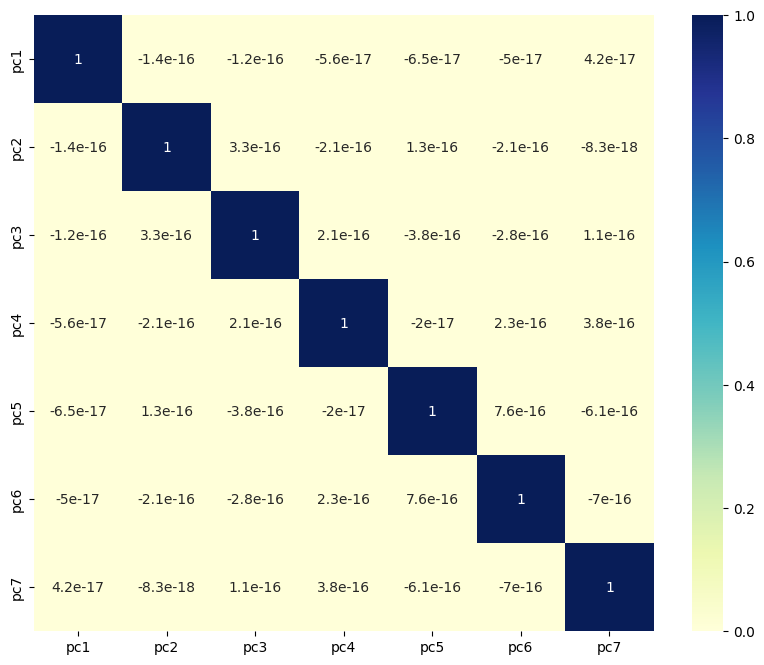

In [33]:
#Plotting the confurion matrix post PCA to confirm no correlation among the principal components

plt.figure(figsize = (10,8))
sns.heatmap(df_final.iloc[:,:7].corr(), annot = True, cmap = 'YlGnBu')
plt.show()

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

### Normalizing the PCs

In [35]:
scaler = StandardScaler()
df_final.iloc[:,:7] = scaler.fit_transform(df_final.iloc[:,:7])

### Splitting the data into training and testing sets

In [36]:
X = df_final.iloc[:,:7]
y = df_final['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 16)

### Gradient Boosting

In [44]:
#Training the model and calculating the accuracy

gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)

gb_accuracy = gb_classifier.score(X_test, y_test)
print("Gradient Boosting Classifier Accuracy:", gb_accuracy)

Gradient Boosting Classifier Accuracy: 0.814


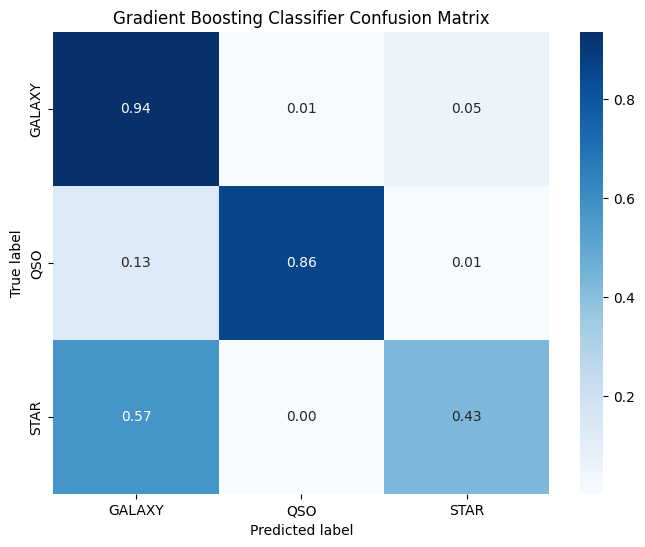

In [45]:
#Plotting the confusion matrix for Gradient Boosting model

from sklearn.metrics import confusion_matrix

gb_pred = gb_classifier.predict(X_test)
gb_cm = confusion_matrix(y_test, gb_pred, normalize='true')

plt.figure(figsize=(8, 6))
sns.heatmap(gb_cm, annot=True, cmap='Blues', fmt=".2f", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Gradient Boosting Classifier Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

### Neural Network

In [42]:
#Training the model and calculating the accuracy

nn_classifier = MLPClassifier(hidden_layer_sizes=(125,), max_iter=500, activation = 'tanh')
nn_classifier.fit(X_train, y_train)

nn_accuracy = nn_classifier.score(X_test, y_test)
print("Neural Network Classifier Accuracy:", nn_accuracy)

Neural Network Classifier Accuracy: 0.9131666666666667


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


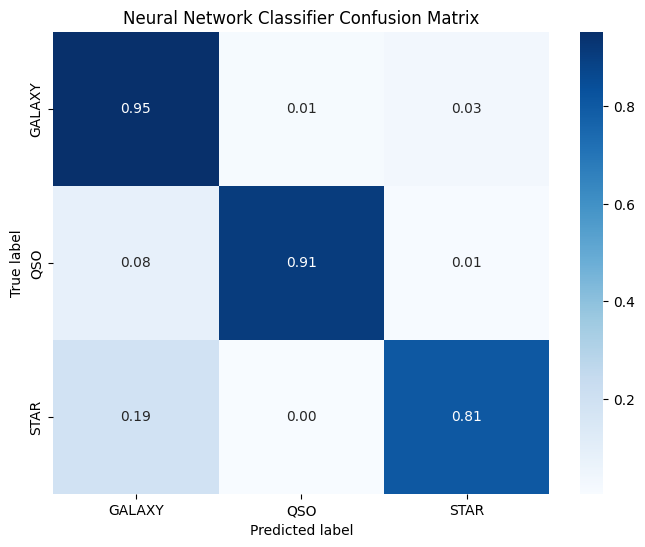

In [46]:
#Plotting the confusion matrix for the Neural Network model

nn_pred = nn_classifier.predict(X_test)
nn_cm = confusion_matrix(y_test, nn_pred, normalize='true')

plt.figure(figsize=(8, 6))
sns.heatmap(nn_cm, annot=True, cmap='Blues', fmt=".2f", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Neural Network Classifier Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

### Random Forest

In [ ]:
#Training the model and calculating the accuracy

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

rf_accuracy = rf_classifier.score(X_test, y_test)
print("Random Forest Classifier Accuracy:", rf_accuracy)

Random Forest Classifier Accuracy: 0.8782777777777778


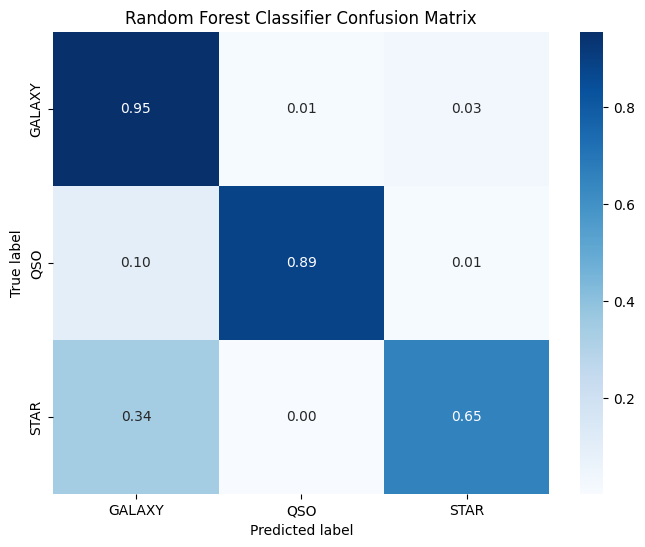

In [ ]:
#Plotting the confusion matrix for Random forest model

rf_pred = rf_classifier.predict(X_test)
rf_cm = confusion_matrix(y_test, rf_pred, normalize='true')

plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, cmap='Blues', fmt=".2f", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Random Forest Classifier Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

### k-Nearest Neighbours

In [ ]:
#Training the model and calculating the accuracy

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

knn_accuracy = knn_classifier.score(X_test, y_test)
print("k-Nearest Neighbors Classifier Accuracy:", knn_accuracy)

k-Nearest Neighbors Classifier Accuracy: 0.8726666666666667


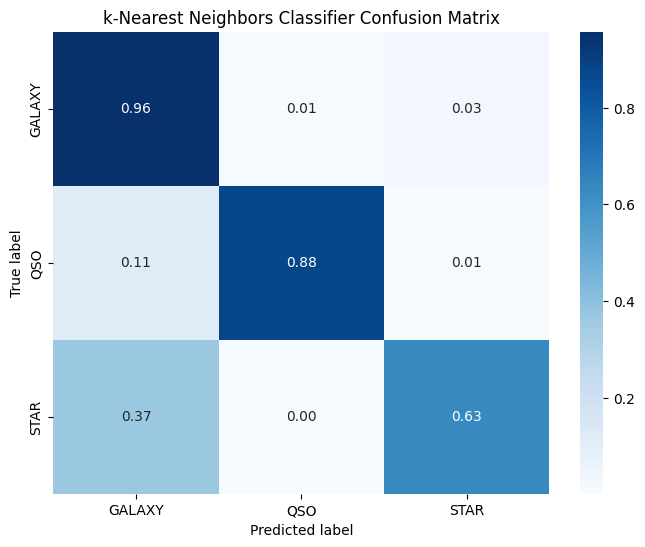

In [ ]:
#Plotting confusion matrix for knn model

knn_pred = knn_classifier.predict(X_test)
knn_cm = confusion_matrix(y_test, knn_pred, normalize='true')

plt.figure(figsize=(8, 6))
sns.heatmap(knn_cm, annot=True, cmap='Blues', fmt=".2f", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('k-Nearest Neighbors Classifier Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

### ROC Curves to compare model performance

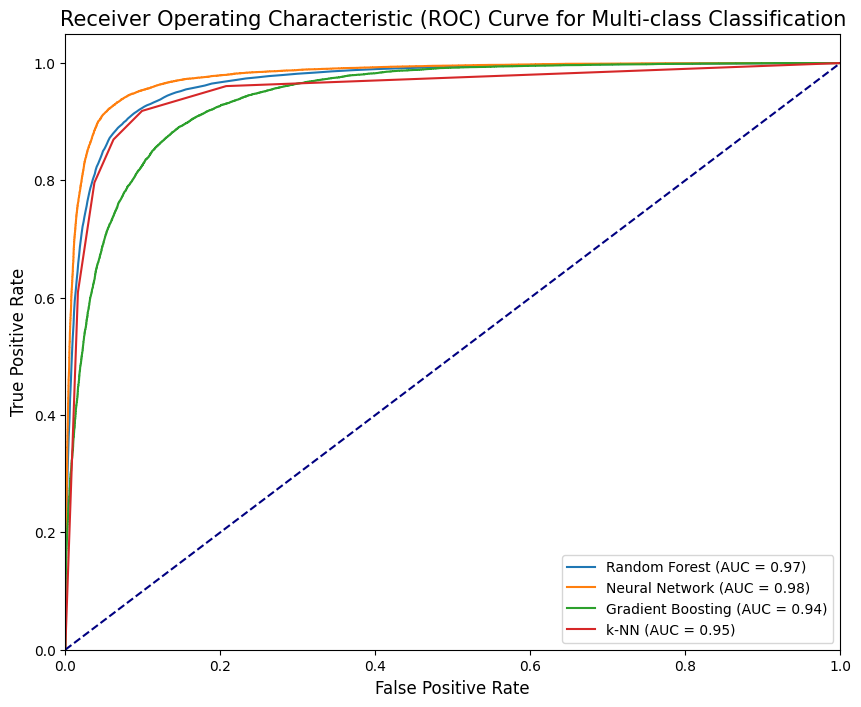

In [ ]:
#Plotting ROC curves for each model
models = {
    "Random Forest": rf_classifier,
    "Neural Network": nn_classifier,
    "Gradient Boosting": gb_classifier,
    "k-NN": knn_classifier
}

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_test_bin = label_binarizer.fit_transform(y_test)

plt.figure(figsize=(10, 8))
for name, model in models.items():
    if name == "Neural Network":
        y_score = model.predict_proba(X_test)
    else:
        y_score = model.predict_proba(X_test)

    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', size = 12)
plt.ylabel('True Positive Rate', size = 12)
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-class Classification', size = 15)
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
metrics = {}

#Collating each performance metric against each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    metrics[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

metrics_df = pd.DataFrame(metrics).T
print(metrics_df)

                   Accuracy  Precision    Recall  F1 Score
Random Forest      0.878278   0.879448  0.878278  0.874247
Neural Network     0.907222   0.907124  0.907222  0.906132
Gradient Boosting  0.814000   0.811719  0.814000  0.800427
k-NN               0.872667   0.875198  0.872667  0.867865


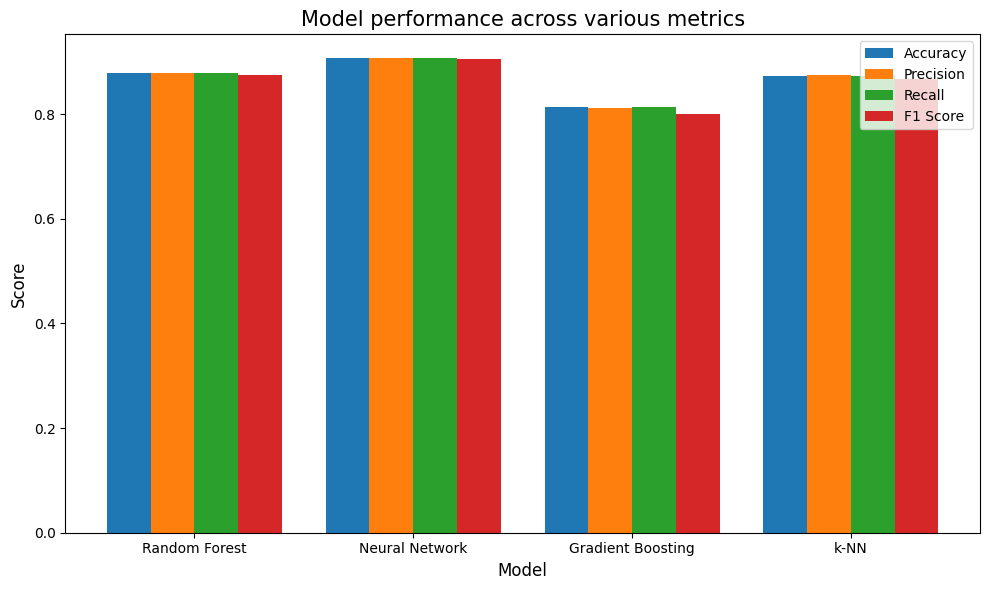

In [ ]:
#Plot
fig, ax = plt.subplots(figsize=(10, 6))

#Number of groups and width for each bar
n_groups = len(metrics_df)
bar_width = 0.2
index = range(n_groups)

#Plotting each metric for each model
for i, col in enumerate(metrics_df.columns):
    plt.bar([x + i * bar_width for x in index], metrics_df[col], width=bar_width, label=col)

plt.xlabel('Model', size = 12)
plt.ylabel('Score', size = 12)
plt.title('Model performance across various metrics', size = 15)
plt.xticks([x + 1.5 * bar_width for x in index], metrics_df.index)
plt.legend()
plt.tight_layout()
plt.show()